# Shell Scripting/Data Gathering

In [13]:
# imports
import subprocess
import time
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

In [ ]:
# cuda script runner
def scriptRunner(n):
    # Replace with desired compiled program path from root to run
    binaryFilePath = "./file_path_here"
    cmd = f"echo " + str(n) + " | " + binaryFilePath
    res = subprocess.run(cmd, capture_output=True, text=True, shell=True)
    
    data = res.stdout.split('\n')[0:2]

    return [n, [int(n) for n in data]]

In [15]:
# Generate Data
maxN = 65535
granularity = 50
nums = [n * (maxN // granularity) for n in range(granularity, 0, -1)]

data = []

for n in nums:
    data.append(scriptRunner(n))

print(data)

[[65500, [2145092250, 13452]], [64190, [2060145955, 9050]], [62880, [1976915760, 3098]], [61570, [1895401665, 44304]], [60260, [1815603670, 3003]], [58950, [1737521775, 2889]], [57640, [1661155980, 2900]], [56330, [1586506285, 31977]], [55020, [1513572690, 19580]], [53710, [1442355195, 25307]], [52400, [1372853800, 43421]], [51090, [1305068505, 39644]], [49780, [1238999310, 63194]], [48470, [1174646215, 27265]], [47160, [1112009220, 2404]], [45850, [1051088325, 8715]], [44540, [991883530, 11173]], [43230, [934394835, 3691]], [41920, [878622240, 9638]], [40610, [824565745, 2141]], [39300, [772225350, 2077]], [37990, [721601055, 2046]], [36680, [672692860, 1982]], [35370, [625500765, 1935]], [34060, [580024770, 1887]], [32750, [536264875, 1784]], [31440, [494221080, 1941]], [30130, [453893385, 1647]], [28820, [415281790, 1571]], [27510, [378386295, 1516]], [26200, [343206900, 1421]], [24890, [309743605, 1352]], [23580, [277996410, 1296]], [22270, [247965315, 1234]], [20960, [219650320, 1

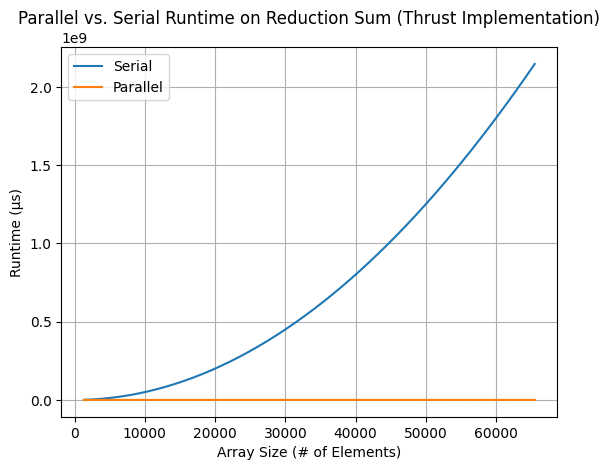

In [19]:
# Plot Data

x = [l[0] for l in data]
y = [l[1] for l in data]

fig, ax = plt.subplots()
ax.plot(x, y)

# TODO: Replace xlabel and ylabel with applicable labels
ax.set(xlabel='Array Size (# of Elements)', ylabel='Runtime (µs)',
       title='Parallel vs. Serial Runtime on Reduction Sum (Thrust Implementation)')
ax.grid()

plt.legend(["Serial", "Parallel"])

fig.savefig("./Runtime Plots/pr_thrust_runtime_plot.png")
plt.show()